# S SRAVANAKUMAR
Task 2 : Prediction using Unsupervised Machine Learning    GRIP @ The Sparks Foundation

In this K-means clustering task I tried to predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset.

Technical Stack : Scikit Learn, Numpy Array, Scipy, Pandas, Matplotlib

In [37]:
# Importing all the libraries needed in this notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [42]:
# Loading and Reading the iris dataset 
# Data available at the link - 'https://bit.ly/3kXTdox'

data = pd.read_csv('C:\\Users\\SRAVANAKUMAR SATHISH\\Desktop\\python work\\Iris.csv')
print('Data import successfull')

Data import successfull


In [43]:
data.head(10) # loads the first five rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [44]:
data.tail() # loads the last five rows


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [45]:
# Checking for NaN values
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [46]:
# Checking statistical description
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [47]:
print(data.Species.nunique())
print(data.Species.value_counts())

3
Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64


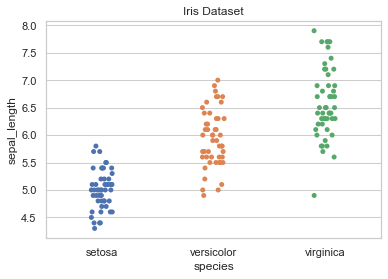

In [48]:
sns.set(style = 'whitegrid')
iris = sns.load_dataset('iris');
ax = sns.stripplot(x ='species',y = 'sepal_length',data = iris);
plt.title('Iris Dataset')
plt.show()

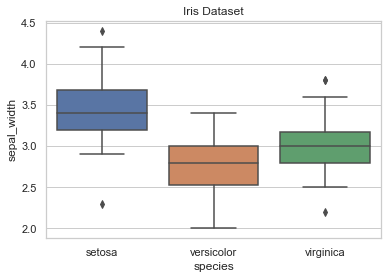

In [49]:
sns.boxplot(x='species',y='sepal_width',data=iris)
plt.title("Iris Dataset")
plt.show()

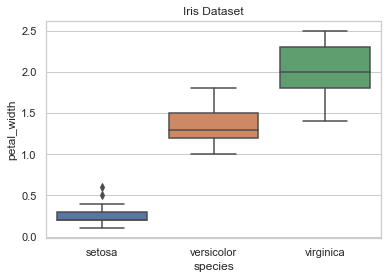

In [50]:
sns.boxplot(x='species',y='petal_width',data=iris)
plt.title("Iris Dataset")
plt.show()

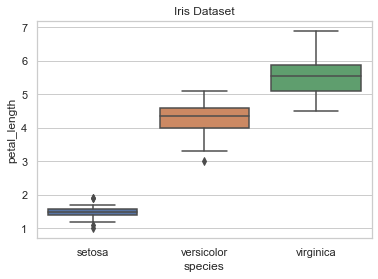

In [51]:

sns.boxplot(x='species',y='petal_length',data=iris)
plt.title("Iris Dataset")
plt.show()

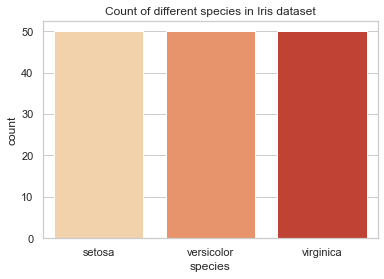

In [52]:
# Count plot
sns.countplot(x='species', data=iris, palette="OrRd")
plt.title("Count of different species in Iris dataset")
plt.show()

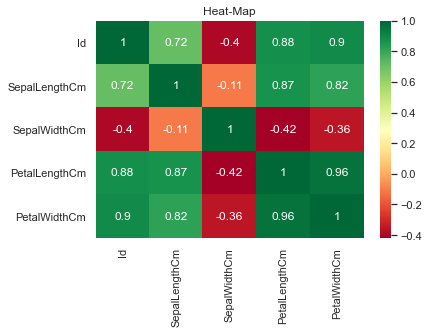

In [53]:
#This is needed for the analysis of two variables, for determining the empirical relationship between them.
sns.heatmap(data.corr(), annot=True,cmap='RdYlGn')
plt.title("Heat-Map")
plt.show()

<AxesSubplot:>

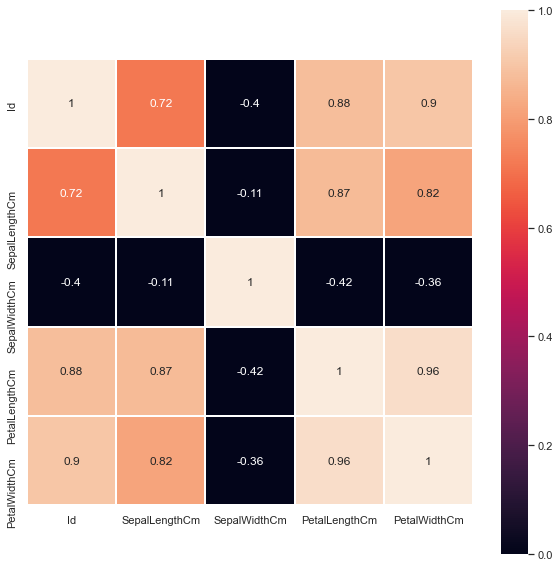

In [54]:
iris1 = data.corr() #finding correlation between variables of iris dataset
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(iris1,vmin=0,vmax=1,square=True,annot=True,linewidth=1)

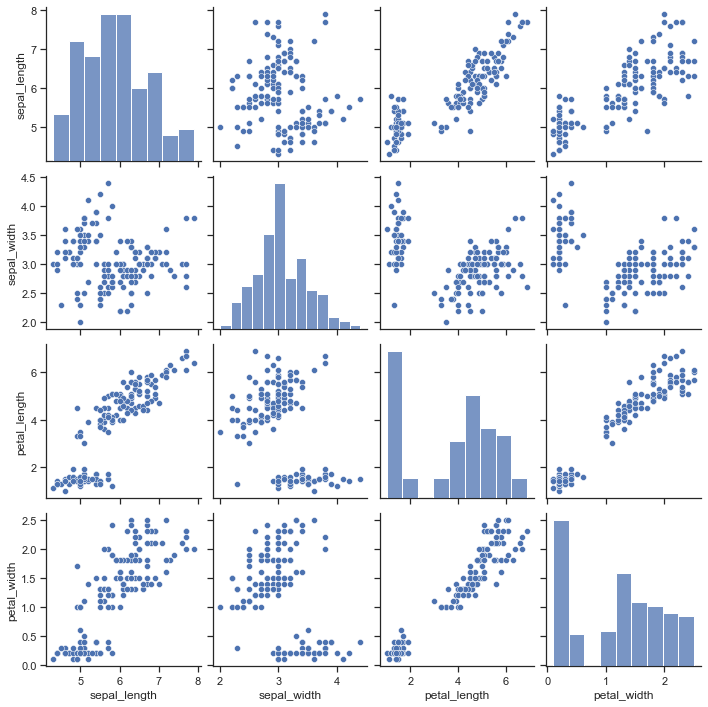

In [55]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris)


import matplotlib.pyplot as plt
plt.show()

In [56]:
# Finding the optimum number of clusters using k-means

x = data.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    ## appending the WCSS to the list (kmeans.inertia_ returns the WCSS value for an initialized cluster)
    wcss.append(kmeans.inertia_) 
    print('k:',i ,"wcss:",kmeans.inertia_)

k: 1 wcss: 281831.54466666654
k: 2 wcss: 70581.3808
k: 3 wcss: 31320.711199999994
k: 4 wcss: 17762.657226173542
k: 5 wcss: 11423.238080088988
k: 6 wcss: 7909.5306730769225
k: 7 wcss: 5881.448116883118
k: 8 wcss: 4562.780079365082
k: 9 wcss: 3579.7205612745106
k: 10 wcss: 2968.4914326653743


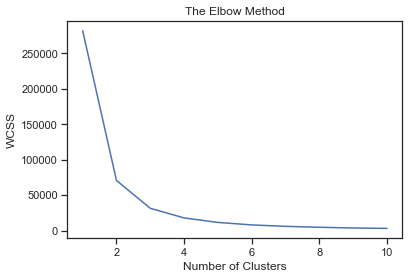

In [57]:
# Plotting the results onto a line graph, allowing us to observe 'The elbow'

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [58]:
# Fitting K-Means to the Dataset 
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)

# Returns a label for each data point based on the number of clusters
y_kmeans = kmeans.fit_predict(x)

In [59]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

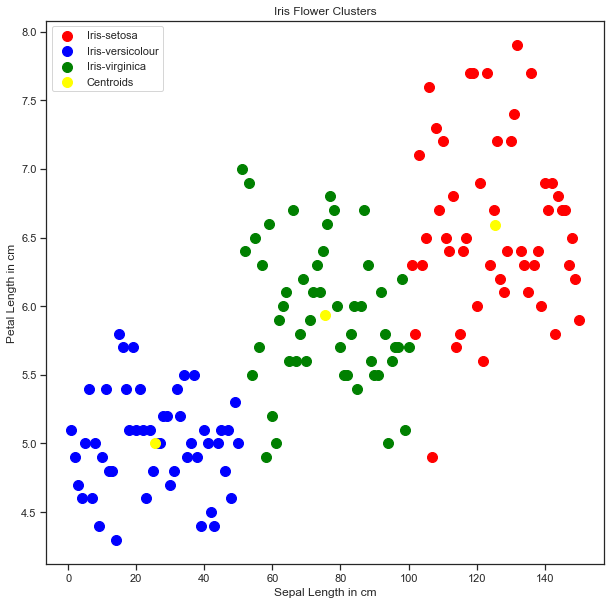

In [60]:

# Visualising the clusters
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()
plt.show()